In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [85]:
sns.set(rc={'figure.figsize':(15,10)})

O primeiro entregável desse cenário deve ser um relatório (de preferência um <a href="https://jupyter.org/">jupyter notebook</a> ou <a href="https://colab.research.google.com/">colab notebook</a> relatando algumas das anomalias encontradas e investigações possíveis (falamos que aqui encorajamos gente curiosa, certo?!)

O dataset a ser utilizado nesse cenário (.zip com arquivo CSV) você encontra <a href="https://drive.google.com/file/d/1a8UCbzXFbqTQi0x8tqCXPRTlB--E7o8I/view?usp=sharing">aqui</a>.

Temos um apreço muito grande por qualidade e disponibilidade. Sendo assim, é bom contarmos com métricas para nos previnir e alertar sobre quaisquer problemas bem como metrificar e monitorar as arquitetura proposta. Logo, apreciamos se você conseguir entregar testes que mensurem a qualidade dos dados junto à sua solução desse primeiro entregável. 

In [11]:
df = pd.read_excel('sample.xls')

In [12]:
df.shape

(9994, 21)

In [13]:
df.iloc[0]

Row ID                                           1
Order ID                            CA-2016-152156
Order Date                     2016-11-08 00:00:00
Ship Date                      2016-11-11 00:00:00
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                  42420
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                       

In [30]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Busca por dados duplicados

In [15]:
# Linhas inteiras duplicadas
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [8]:
# Colunas Row ID duplicada
df[df['Row ID'].duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [20]:
# Colunas Row ID duplicada
df[df['Order ID'].duplicated()].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


Order ID parece ser duplicado

In [28]:
order_id = 'CA-2016-152156'
df[df['Order ID'] == order_id].iloc[0]

Row ID                                           1
Order ID                            CA-2016-152156
Order Date                     2016-11-08 00:00:00
Ship Date                      2016-11-11 00:00:00
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                  42420
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                       

In [29]:
df[df['Order ID'] == order_id].iloc[1]

Row ID                                                           2
Order ID                                            CA-2016-152156
Order Date                                     2016-11-08 00:00:00
Ship Date                                      2016-11-11 00:00:00
Ship Mode                                             Second Class
Customer ID                                               CG-12520
Customer Name                                          Claire Gute
Segment                                                   Consumer
Country                                              United States
City                                                     Henderson
State                                                     Kentucky
Postal Code                                                  42420
Region                                                       South
Product ID                                         FUR-CH-10000454
Category                                                 Furni

Ao analisar os itens duplicados, parace ser na verdade uma propriedade dos dados. Onde cada linha corresponde a um ITEM de uma COMPRA. Possivelmente deve existir outra tabela para cruzar com o Order ID e obter a informação completa sobre total da venda e método de pagamento.

## Missing data

In [43]:
for col in df.columns:
    df_missing_data = df[df[col].isna()].copy()
    if not df_missing_data.empty:
        print(f'Missing data on {col}')
    else:
        print(f'{col} ok')

Row ID ok
Order ID ok
Order Date ok
Ship Date ok
Ship Mode ok
Customer ID ok
Customer Name ok
Segment ok
Country ok
City ok
State ok
Postal Code ok
Region ok
Product ID ok
Category ok
Sub-Category ok
Product Name ok
Sales ok
Quantity ok
Discount ok
Profit ok


## Date columns

### Se o tipo não estiver correto, e não for possível transoformar. Significa que existe algo de errado com a DATA.

In [56]:
dt_types = ('<M8[ns]', 'datetime64[ns]')

In [70]:
dt_columns = ['Order Date', 'Ship Date']

for col in dt_columns:
    if not df[col].dtypes in datetime_types:
        try:
            df[col] = datetime(df[col])
        except TypeError:
            print(f'Coluna {col} fora do padrao de data!')

### Se o Order Date for maior que o Ship Date

In [71]:
df[df['Order Date'] > df['Ship Date']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### Numeric values

In [72]:
df.iloc[0]

Row ID                                           1
Order ID                            CA-2016-152156
Order Date                     2016-11-08 00:00:00
Ship Date                      2016-11-11 00:00:00
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                  42420
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                       

In [73]:
numeric_data = ['Postal Code','Sales','Quantity', 'Profit']

In [78]:
for col in numeric_data:
    df_negative = df[df[col] < 0]
    if not df_negative.empty:
        print(f'{col} com valores negativos')
    else:
        print(f'{col} ok')        

Postal Code ok
Sales ok
Quantity ok
Profit com valores negativos


Faz sentido Profit ter valores negativos ?

### Outliers

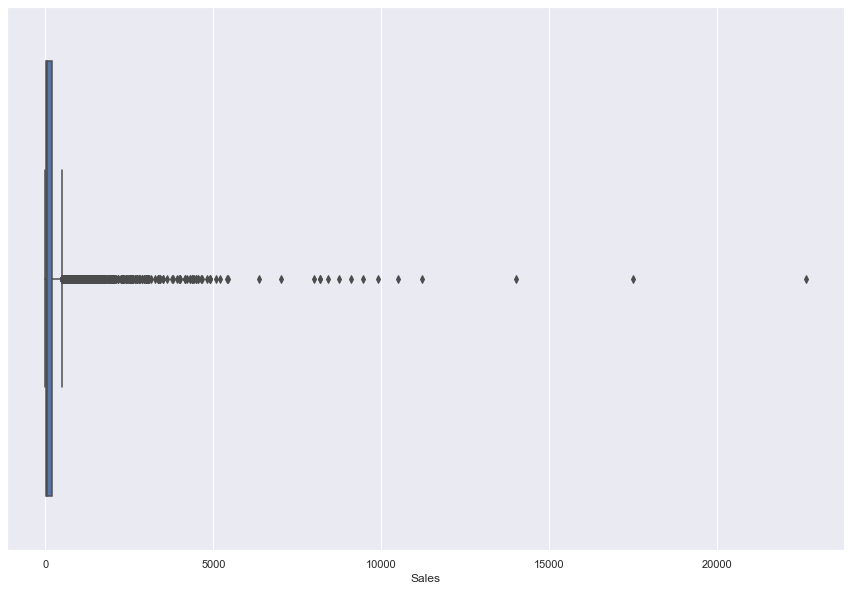

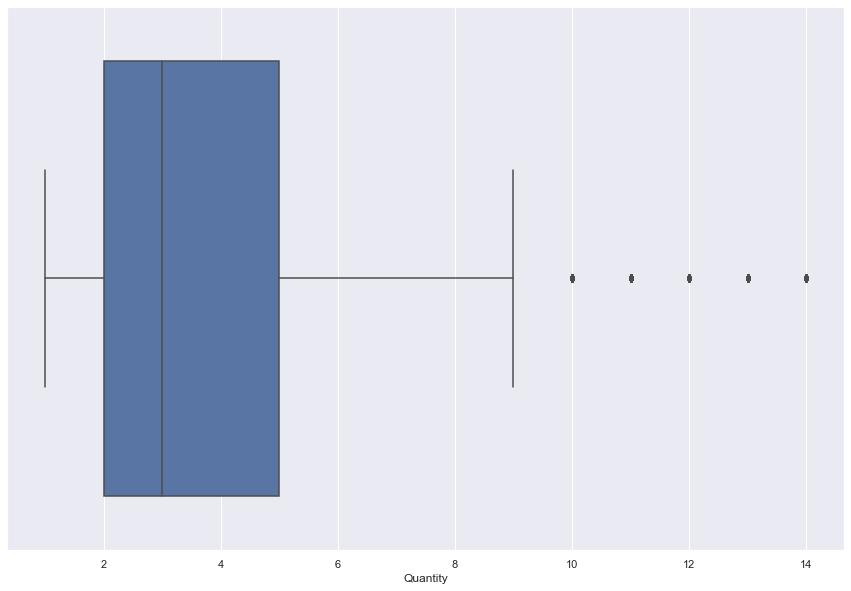

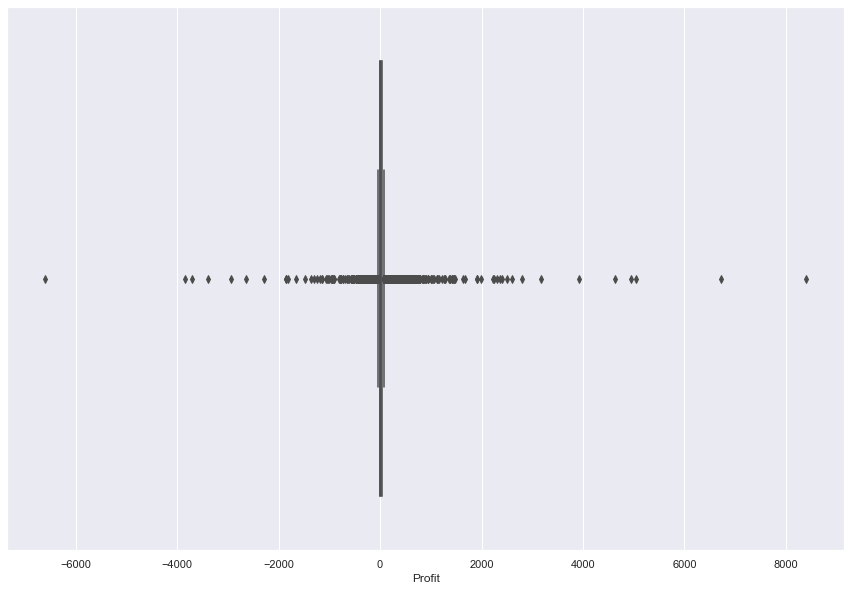

In [88]:
quantity_data = ['Sales','Quantity', 'Profit']

for col in quantity_data:
    sns.boxplot(x=df[col])
    plt.show()

Usando o boxplot do sns podemos observar que com exceção da coluna Quantity, existem bastante dados fora do teceiro quartil